In [42]:
import glob
from collections import defaultdict

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show(data):
    """Visually compare transformations side by side.
        this function will taka a tensor and a list of transformations 
    """
    
    # Here we combine two functions from basic python to validate the input to the function:
    # - `all` takes an iterable (something we can loop over, e.g. a list) of booleans
    #    and returns True if every element is True, otherwise it returns False.
    # - `isinstance` checks whether a variable is an instance of a particular type (class)
        
    num = len(data)
    fig, axes = plt.subplots(num, 1, figsize=(5, 5*num))
    
    for axis, (id, labels, label) in zip(axes, data):

        axis.set_title(str((id, labels, label))).set_fontsize(14)
        axis.imshow(mpimg.imread(f'test/{id}.jpg'))

    plt.show()

In [110]:
subs = glob.glob("submission*99*.csv")
vote = len(subs)
subs, vote

(['submission_asma_arty_resnet_ft_995.csv',
  'submission_asma_arty_resnext_fft_996.csv',
  'submission_asma_arty_resnext_fta_995.csv',
  'submission_asma_arty_wide_resnet_fft_997.csv',
  'submission_asma_arty_wide_resnet_ft_997.csv',
  'submission_asma_arty_resnext_ft_996.csv',
  'submission_asma_arty_vit_fta_996.csv',
  'submission_asma_arty_resnet_fta_996.csv',
  'submission_asma_arty_wide_resnet_fta_996.csv'],
 9)

In [111]:
data = defaultdict(list)
for path in subs:
    with open(path, "r") as f:
        lines = f.readlines()
    for l in lines[1:]:
        id, label = list(map(int, l.strip().split(",")))
        data[id].append(label)

In [127]:
check = []
close = []
ans = []
for id, labels in data.items():
    s = sum(labels)/len(labels)
    if s != 1 and s != 0:
        check.append((id, tuple(labels), s ))
        if abs(s-0.5) < 2/vote:
            close.append((id, tuple(labels),  s))
            ans.append((id, s))
        else:
            ans.append((id, float(int(s+.5))))
    else:
        ans.append((id, s))

print(len(check))
print(len(close))


181
36


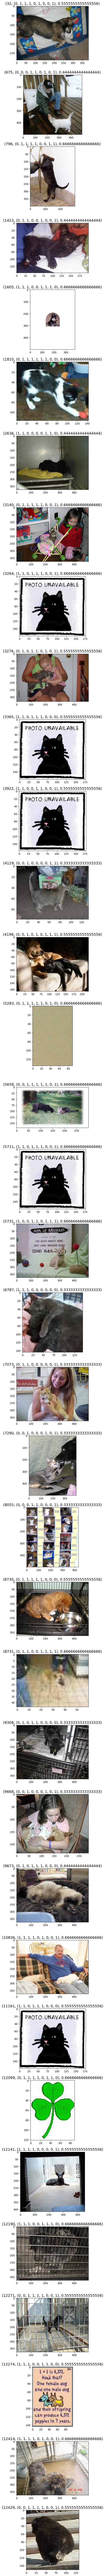

In [128]:
show(close)

In [114]:
show(check)


ValueError: Image size of 500x90500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 500x90500 with 181 Axes>

In [129]:
with open("final_submission_asma_arty.csv", "w") as f:
    f.write("id,label\n" + "\n".join([f"{i},{l}" for i, l in ans]))